<center><font size = "10"> Week 10 - Cells in Space  <center>
<center><font size = "8">Home work - Solutions<center>

<font size = "3">Please, write your group number and the names and surnames of the group members here
<br>Group number: 8
<br>Group member1: Chiara Maria Matti
<br>Group member2: Elena Grazia Gado
<br>Group member3: Eliser Josan Romero

In [1]:
# Useful functions
def shift_morphology(morph,shift):
    morph2 = morph.transform(lambda p: p + shift)
    return morph2
       

def center_morphology(morph):
    center = morph.soma.center.copy()
    return shift_morphology(morph,-center)

# Poorman's plotting of morphologies
def plot_morphology(morph, plane = 'XY',somaOnly = False):
    colors_dict={nm.BASAL_DENDRITE:'red', 
            nm.APICAL_DENDRITE:'green',
            nm.AXON:'blue',
            nm.SOMA:'black'}

    planes = { 'XY': [0,1], 'XZ': [0,2], 'YZ': [1,2], 'YX': [1,0], 'ZX': [2,0], 'ZY': [2,1] }
   
    if not somaOnly:
        for n in morph.neurites:
            pts = n.points[:,[0,1,2]]
            plt.scatter(pts[:,planes[plane][0]],pts[:,planes[plane][1]],s=1,c=colors_dict[n.type.value],marker='.')
        
    pts = morph.soma.center
    
    plt.scatter(pts[planes[plane][0]],pts[planes[plane][1]],c=colors_dict[nm.NeuriteType.soma.value],marker='D')
   
def plot_morphologies(morphlist, plane = 'XY',somaOnly = False, comp_title = ''):
    fig = plt.figure()
    fig.suptitle(comp_title + plane)
    
    for i,m in enumerate(morphlist):
        plot_morphology(m, plane = plane, somaOnly = somaOnly)
        

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import numpy as np
from neuron import h
import neurom as nm
from neurom import view

sns.set_style('darkgrid')


--No graphics will be displayed.


In [3]:
PATHWAY = "toy_data/"
CSV_FILE = "10um_cells.csv"


## <font color= 'red'>Ex 1:</font> Placing cells

<font size='3'> 10um_cells.csv Is a table with (among other information) the positions of neurons in a model of the primary visual cortex (within the cooridnate system of the allen mouse brain atlas).
   The ascii files contain the morphologies of these cells (the number corresponds to the row in the csv).
    
Load the morphologies and dataframe and place the cells at the x, y, z positions reported in the table.
Visualize the morphologies in all three planes.

<font size='3'><font color= 'red'>[1 pts]</font>

### a) Loading all morphologies and the dataframe

soma center: [ 1.05963814e-07  1.58945724e-07 -1.32454772e-07]


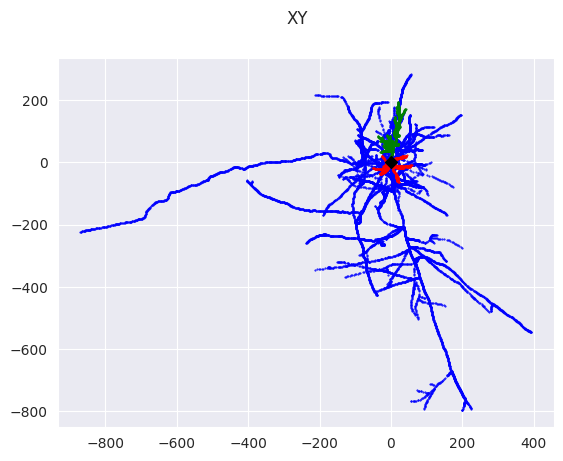

In [4]:
# morphologies
morphs = []
for i in range(21):
    morphs.append(nm.load_morphology(PATHWAY + f"morph{i}.asc"))
# Check that it is not centered
print('soma center:',morphs[0].soma.center)
# Visualize it
plot_morphologies([morphs[0]])

In [5]:
# dataframe
cells = pd.read_csv(PATHWAY + CSV_FILE)
cells.head()

,population,node_ids,@dynamics:AIS_scaler,@dynamics:holding_current,@dynamics:threshold_current,etype,hemisphere,layer,model_template,morph_class,...,orientation_z,region,subregion,synapse_class,x,y,z,u,v,w
0,V1_neurons,2636,1.999871,-0.042052,0.044711,cNAC,right,1,hoc:cNAC_L23BTC,INT,...,0.0,VISp,VISp1,INH,9159.856412,849.607659,8471.411102,0.230151,-0.863247,0.449260
1,V1_neurons,16297,1.083266,-0.006020,0.030312,cADpyr,right,2,hoc:cADpyr_L2IPC_4,PYR,...,0.0,VISp,VISp2,EXC,9142.949909,927.600874,8416.164840,0.229860,-0.864498,0.446998
2,V1_neurons,19473,0.937301,-0.003934,0.025766,cADpyr,right,2,hoc:cADpyr_L2IPC_4,PYR,...,0.0,VISp,VISp2,EXC,9129.453698,938.682191,8412.520125,0.229860,-0.864498,0.446998
3,V1_neurons,45243,3.412109,-0.043973,0.042438,cACint,right,3,hoc:cACint_L23MC,INT,...,0.0,VISp,VISp2,INH,9146.289262,883.907950,8436.281624,0.228312,-0.865317,0.446207
4,V1_neurons,49867,3.578842,-0.043420,0.130344,dNAC,right,3,hoc:dNAC_L23SBC_4,INT,...,0.0,VISp,VISp2,INH,9140.717362,912.379077,8426.266720,0.229901,-0.864030,0.447882


### b) Placing and Centering all morphs

In [6]:
#getting position for each morphologies in df
pos = []
for index, row in cells.iterrows():
    x = row["x"]
    y = row["y"]
    z = row["z"]
    pos.append((x, y, z))
pos

[(9159.85641172727, 849.6076590997865, 8471.411101923097),
 (9142.949909093197, 927.6008738955048, 8416.164840439433),
 (9129.453698160363, 938.68219093475, 8412.520124731142),
 (9146.289262206132, 883.9079499443611, 8436.281623973156),
 (9140.717361993236, 912.3790773032342, 8426.266719967543),
 (9095.146114778569, 1092.275592594897, 8337.665634430852),
 (9121.813230135946, 981.54931806247, 8386.720090968214),
 (9106.234251362142, 1047.3617251828275, 8354.631173378253),
 (9091.511434184496, 1090.6051115974826, 8333.323652526733),
 (9133.1046570442, 996.2681106689532, 8389.060328742968),
 (9078.895348163667, 1178.8807771109405, 8301.5564938424),
 (9079.883343302208, 1134.2891003977795, 8317.13241711805),
 (9023.53373046488, 1373.0147134329802, 8190.780183519726),
 (9049.116816768712, 1251.9044390991223, 8255.191594708695),
 (9020.451338709718, 1374.3958739713712, 8190.707322044099),
 (9031.294249781897, 1342.1139526148274, 8197.183153914199),
 (9019.10594945697, 1407.901733840588, 8177

In [7]:
for i,m in enumerate(morphs):
    m=center_morphology(m)
    m=shift_morphology(m,pos[i])
    morphs[i]=m

[x.soma.center for x in morphs] # print centers

[array([9159.855  ,  849.60767, 8471.411  ], dtype=float32),
 array([9142.95   ,  927.60095, 8416.165  ], dtype=float32),
 array([9129.454 ,  938.6822, 8412.52  ], dtype=float32),
 array([9146.289  ,  883.90796, 8436.282  ], dtype=float32),
 array([9140.717 ,  912.3791, 8426.267 ], dtype=float32),
 array([9095.1455, 1092.2755, 8337.665 ], dtype=float32),
 array([9121.813 ,  981.5494, 8386.72  ], dtype=float32),
 array([9106.233 , 1047.3617, 8354.631 ], dtype=float32),
 array([9091.512 , 1090.6051, 8333.323 ], dtype=float32),
 array([9133.1045,  996.2681, 8389.061 ], dtype=float32),
 array([9078.8955, 1178.8807, 8301.557 ], dtype=float32),
 array([9079.883 , 1134.2891, 8317.132 ], dtype=float32),
 array([9023.534 , 1373.0148, 8190.7803], dtype=float32),
 array([9049.118 , 1251.9044, 8255.191 ], dtype=float32),
 array([9020.451 , 1374.3959, 8190.707 ], dtype=float32),
 array([9031.295 , 1342.1139, 8197.184 ], dtype=float32),
 array([9019.105 , 1407.9017, 8177.1562], dtype=float32),
 arra

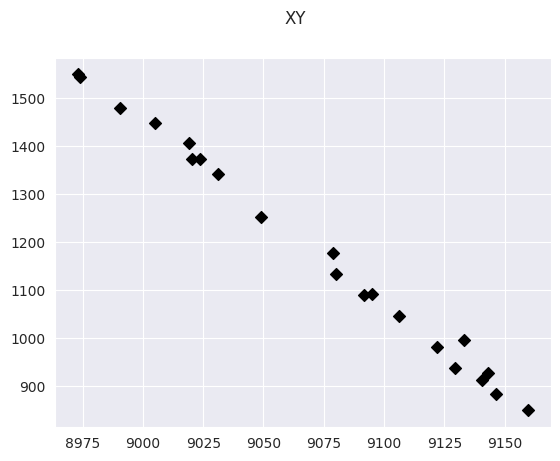

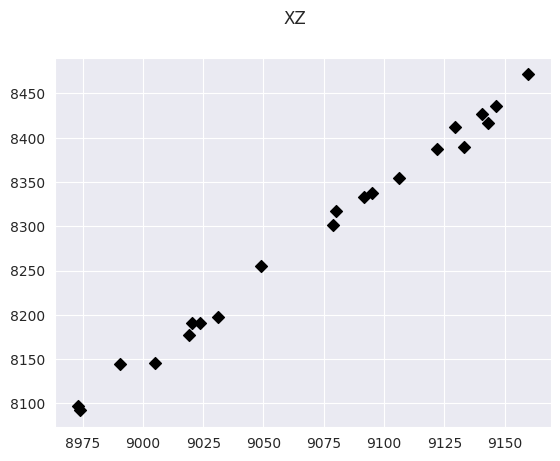

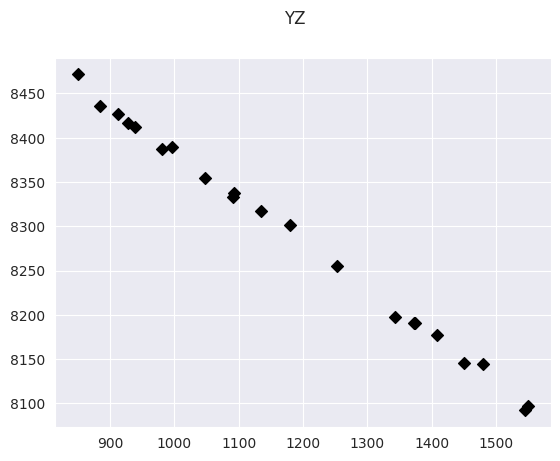

In [8]:
# Plot soma locations
planes = ['XY', 'XZ', 'YZ']

for i, plane in enumerate(planes):
    plot_morphologies(morphs, plane = plane, somaOnly = True)


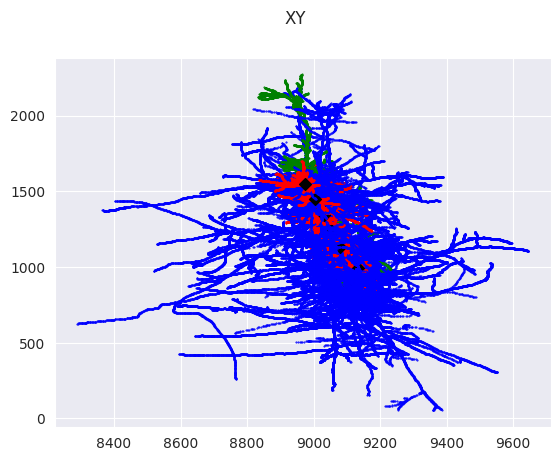

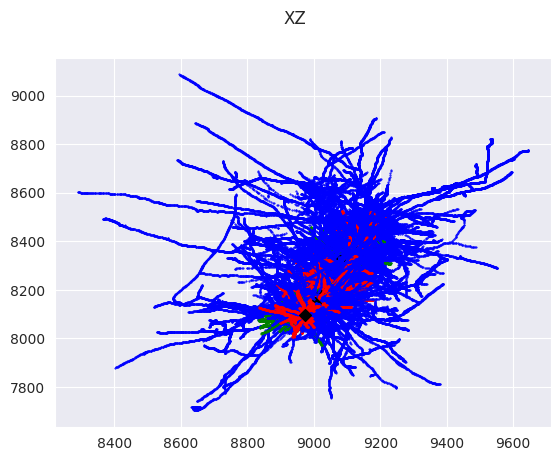

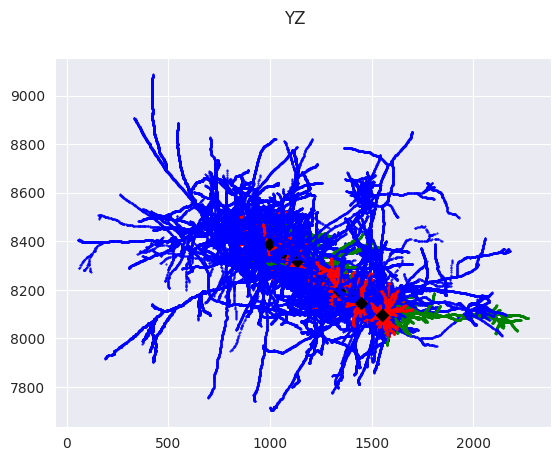

In [9]:
# plotting all
for i, plane in enumerate(planes):
    plot_morphologies(morphs, plane = plane, somaOnly = False)


## <font color= 'red'>Ex 2:</font> Rotate cells

Align each cell's y-axis with the vector 'u', 'v', 'w'  reported for it in 21_cells.csv.
At the end of this part their soma positions should still be the same as they were at the end of Ex 1.
Visualize them again in all three planes.

Hint: consider the order of rotation/translation operations.

In [10]:
# rotation functions

# Rotation matrix around Z axis, angle theta CCW (degrees)
def rotz(theta):
    radtheta = theta * np.pi / 180.0 # in radians
    R = np.array([[np.cos(radtheta),-np.sin(radtheta),0],
                  [np.sin(radtheta),np.cos(radtheta),0],
                  [0,0,1]])
    return R

# apply rotation matrix R
def rotate_morphology(morph,R):
    morph = morph.transform(lambda p: R.dot(p.T).T)
    return morph

def rotz_morphology(morph,theta):
    R = rotz(theta)
    return rotate_morphology(morph,R)

def align_morphology_Y(morph,axis):
    # Rotation matrix that aligns the Y axis [0,1,0] to an arbitrary vector b (other than Y or -Y)
    # From https://math.stackexchange.com/a/476311
    a = np.array([0,1,0])

    b = np.array(axis) # target axis
    b = b / np.linalg.norm(b) # make unit norm

    v = np.cross(a,b)     # a x b
    s = np.linalg.norm(v) # ||v|| = sin(theta)
    c = a.dot(b)          # a . b = cos(theta)

    # Skew-symmetric cross-product matrix
    V = np.zeros((3,3))
    V[0,1] = -v[2]
    V[1,0] =  v[2]
    V[0,2] =  v[1]
    V[2,0] = -v[1]
    V[1,2] = -v[0]
    V[2,1] =  v[0]

    # Rotation matrix
    R = np.diag((1.0,1.0,1.0))
    R += V
    R += V.dot(V) * (1.0 - c) / (s * s)

    # Test
    if not np.max(R.dot(a) - b) < 1E-12:
        raise ValueError('Matrix not good!')
    
    # Rotate morphology
    return rotate_morphology(morph,R)


### a) Extracting u,v and w vectors

In [11]:
# extract vectors u, v, w
bs =[]
for index, row in cells.iterrows():
    u = row["u"]
    v = row["v"]
    w = row["w"]
    bs.append([u, v, w])
bs

[[0.2301511038074347, -0.8632473427056446, 0.4492599411564119],
 [0.2298596602181102, -0.864498081663347, 0.4469984378102544],
 [0.2298596602181102, -0.864498081663347, 0.4469984378102544],
 [0.2283122653993853, -0.8653166578181815, 0.4462068927869367],
 [0.2299013918100014, -0.8640297475060255, 0.447881619927072],
 [0.2286788308109339, -0.865692424729966, 0.4452893644632628],
 [0.228397327432628, -0.8657859968577584, 0.4452519157360812],
 [0.2302659817898804, -0.8645844594857008, 0.4466220886232129],
 [0.2286788308109339, -0.865692424729966, 0.4452893644632628],
 [0.231641554527987, -0.8635285621411624, 0.4479515739254347],
 [0.233557157582867, -0.8622283557099764, 0.4494589155323125],
 [0.2301703134063585, -0.8647661870007763, 0.446319469266754],
 [0.2280500437146097, -0.8669323293087241, 0.4431946682453597],
 [0.2298662371845748, -0.8663034358773678, 0.4434860426097669],
 [0.2280500437146097, -0.8669323293087241, 0.4431946682453597],
 [0.2271538810816097, -0.8652850243020991, 0.4468

### b) Aligning the y-axis with u,v and w vectors + centering and translating back to soma into the initial position

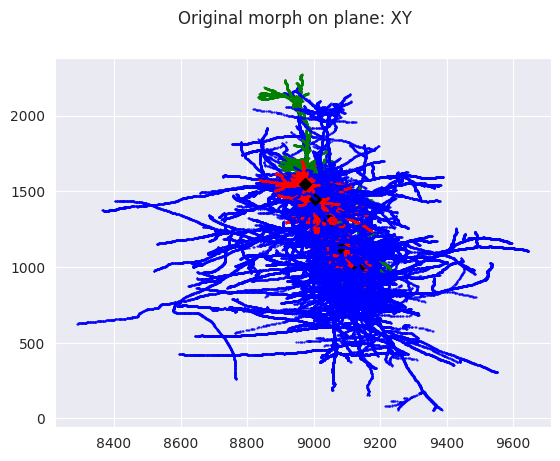

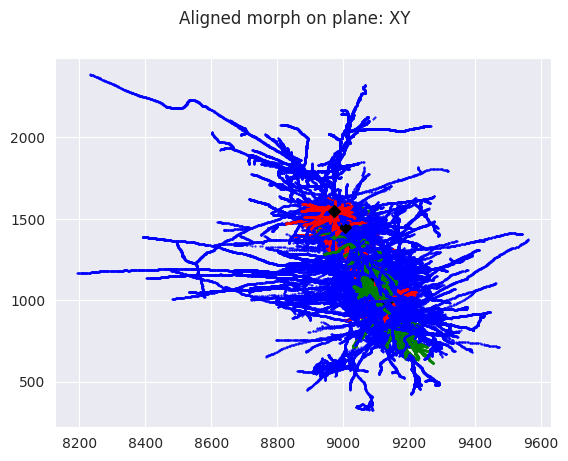

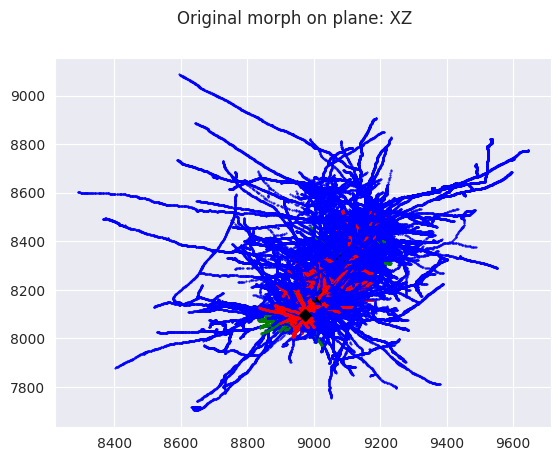

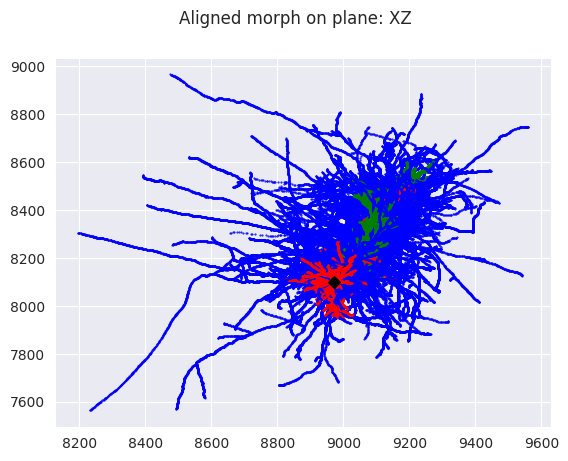

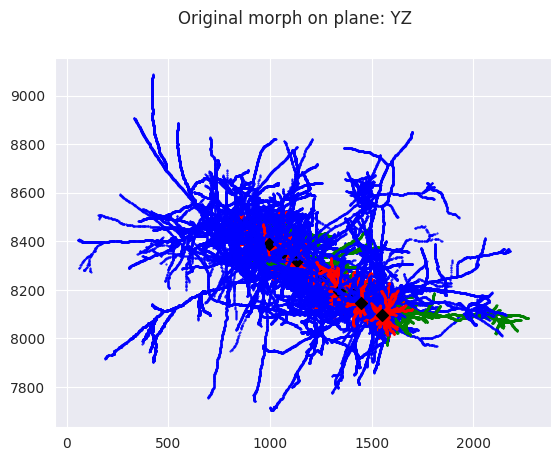

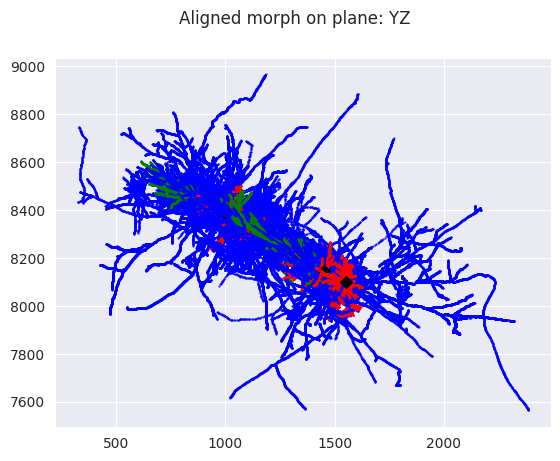

In [12]:
align_morphs = []
for morph, b, p in zip(morphs, bs, pos):
    new_morph = align_morphology_Y(morph,b) # align y-axis with vector u,v,w of df with rotation
    new_morph = center_morphology(new_morph)
    align_morphs.append(shift_morphology(new_morph, p))# translate back to initial position
    
# plotting all
for i, plane in enumerate(planes):
    plot_morphologies(morphs, plane = plane, somaOnly = False, comp_title = "Original morph on plane: ")
    plot_morphologies(align_morphs, plane = plane, somaOnly = False, comp_title = "Aligned morph on plane: ")

### c) Checking soma position before vs after

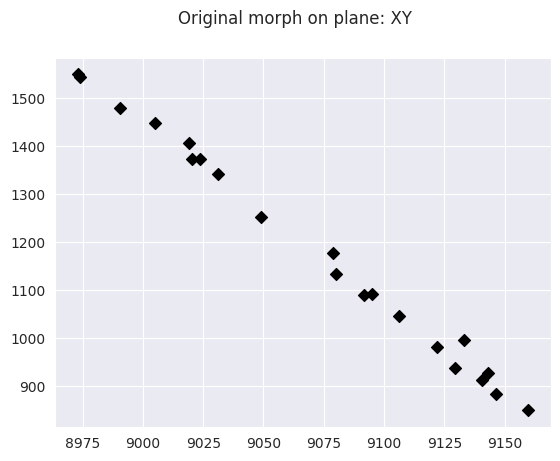

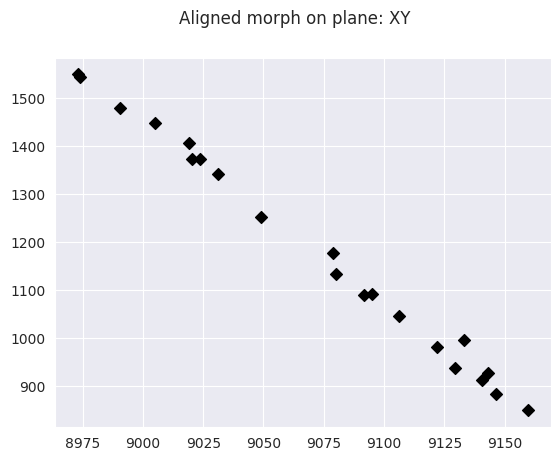

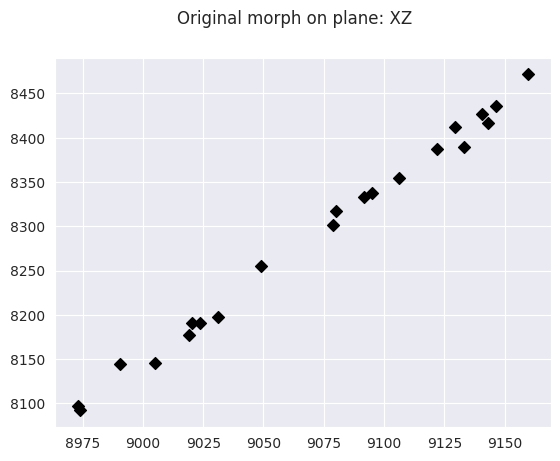

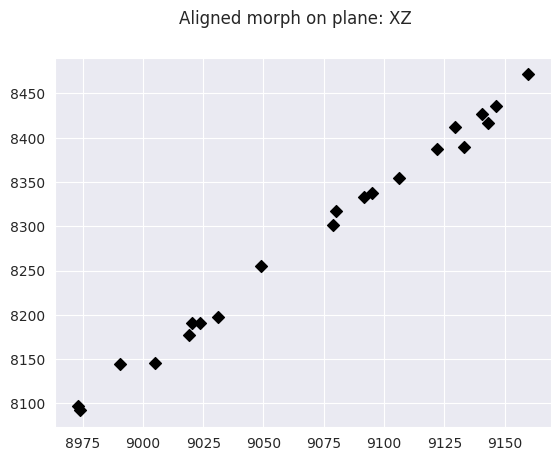

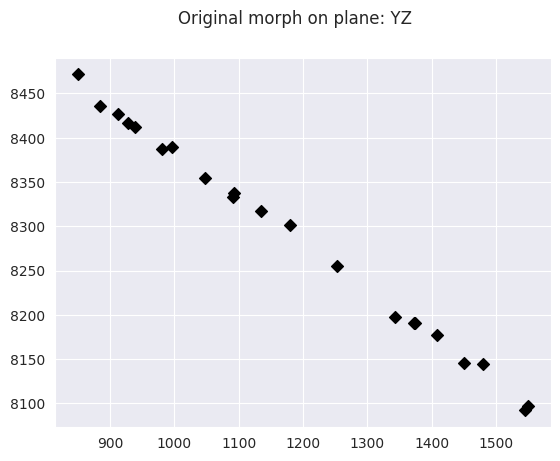

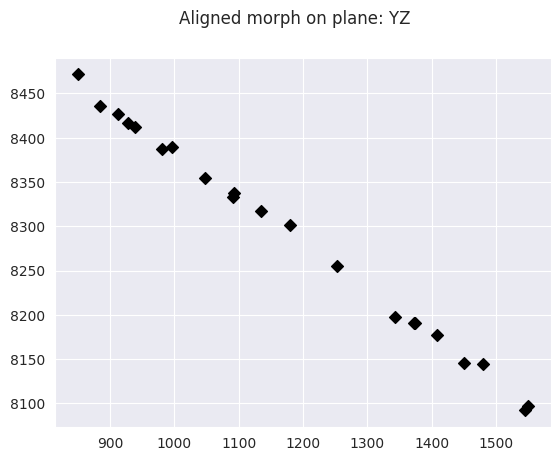

In [13]:
# plotting only soma
for i, plane in enumerate(planes):
    plot_morphologies(morphs, plane = plane, somaOnly = True, comp_title = "Original morph on plane: ")
    plot_morphologies(align_morphs, plane = plane, somaOnly = True, comp_title = "Aligned morph on plane: ")

<span style="color:green">
<font size='3'>

### **Grading**: 

- 1 pts for correct rotation and positon
- 0.5 pts for plotting 3 axes

</span>

## <font color= 'red'>Ex 3:</font> Synaptic pruning rules
<font size=4>
To anatomically constrain the connectivity between the neurons using this geometry we need to identify the potential synapse sites between them. 
However, going from potential synapse sites to actual synapse sites is generally not straightforward.

We are not going to implement the above algorithm, instead we will do something simpler.

Suppose in the brain region we are modeling we have only very coarse-grained data on connection probability: the overall connection probability for cells with soma within 10um of an inserted electrode. This data reveals an overall connection probability of 0.05. Additionally, we have some data that the number of synapses per connection within this brain region tends to be a poisson distribution with a mean of 6.
    
To add the anatomical constraint, we apply a simple version of Peters' rule where we assume that the expectation value of the number of synapses between a pair of neurons is proportional to the number of potential synapse sites.

$E[n_{syn}|n_{app}=\hat{n_{app}}] = C \hat{n_{app}}$
    
Where $n_{syn}$ and $n_{app}$ are the number of synapses and appositions(potential synapse sites) respectively, and C is a constant.
    
Conditional expectation value is defined as:
    
    
$ E[n_{syn}|n_{app}=\hat{n_{app}}] = \sum_{\hat{n_{syn}} = 0}^{\infty} \hat{n_{syn}} P(n_{syn}=\hat{n_{syn}}|n_{app}=\hat{n_{app}})$
    
The simplest solution that satisfies this constraint is to have a fixed probability of converting a potential synapse site into an actual synapse, leading to a binomial distribution.

$P(n_{syn}=\hat{n_{syn}}|n_{app}=\hat{n_{app}}) = Binom(n=\hat{n_{app}}, k=\hat{n_{syn}}, p=C)$
    
We recieve some data that the average density of synapses is 28% of the density of potential synapse sites, setting C at 0.28.

appositions.csv contains all potential synapse sites identified between the 21 neurons we placed before.
Apply this general pruning and provide a dataframe of actualy synapses based on it.

Subsequently:
    
    - calculate the overall connection probability. 
    - plot a histogram of the number of synapses per connection. Ensure you use a bin size of 1 (so 1, 2, 3, 4 etc.)
    - on the same axis, plot the probability mass function of a poisson dstribution at 6 synapses per connection.

Based on these outcomes, what are some limitations of this naive synapse placement rule? Can you suggest one or more improvements that would lead to more realistic connectivity?

<font color='red'> [3 pts]
    
Further reading: 
    This problem gets far more complex when you consider that each brain region consists of many cell types with differing connectivity properties.
    for an example of how this kind of problem can be addressed in practice, see this paper: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4597796/ 

<span style="color:green">
<font size='3'>

### **Grading**: 

- 0.5 pt for implementing the rule.
- 0.5 pts each for connection probability and synapses per connection.
- 1 pts for answering the questions

</span>

In [14]:
appositions = pd.read_csv("toy_data/10um_appositions.csv")
appositions.head()


,population,edge_ids,@source_node,@target_node,efferent_section_id,efferent_surface_z,afferent_center_y,efferent_center_z,efferent_segment_id,afferent_surface_z,...,afferent_section_type,afferent_section_id,afferent_section_pos,afferent_surface_y,afferent_segment_offset,efferent_surface_y,afferent_surface_x,efferent_center_y,efferent_section_pos,efferent_center_x
0,V1_neurons__V1_neurons__chemical_synapse,2997519,19473,2636,151,8481.373,804.57070,8481.260,48,8482.396,...,3,613,0.781682,804.47630,0.159011,803.49506,9179.472,803.36770,0.773995,9180.0625
1,V1_neurons__V1_neurons__chemical_synapse,2997911,45243,2636,84,8496.062,850.48200,8495.991,7,8496.603,...,3,619,0.771799,850.46454,0.946993,850.26740,9184.358,850.25750,0.705606,9186.2320
2,V1_neurons__V1_neurons__chemical_synapse,2997912,45243,2636,176,8439.580,896.38336,8439.572,15,8438.884,...,3,588,0.998704,896.40380,0.846684,896.60754,9161.349,896.65440,0.974271,9160.3470
3,V1_neurons__V1_neurons__chemical_synapse,2997913,45243,2636,177,8440.750,895.43353,8440.821,3,8439.062,...,3,588,0.976641,895.47076,0.960646,895.92926,9161.347,895.98376,0.018393,9160.9710
4,V1_neurons__V1_neurons__chemical_synapse,2997914,45243,2636,178,8440.553,895.00507,8440.653,5,8439.190,...,3,588,0.966387,895.04535,0.512062,895.39294,9161.430,895.45030,0.040814,9161.7720


In [15]:
appositions.describe()

,edge_ids,@source_node,@target_node,efferent_section_id,efferent_surface_z,afferent_center_y,efferent_center_z,efferent_segment_id,afferent_surface_z,afferent_segment_id,...,afferent_section_type,afferent_section_id,afferent_section_pos,afferent_surface_y,afferent_segment_offset,efferent_surface_y,afferent_surface_x,efferent_center_y,efferent_section_pos,efferent_center_x
count,2.356000e+03,2356.000000,2356.000000,2356.000000,2356.000000,2356.000000,2356.000000,2356.000000,2356.000000,2356.000000,...,2356.000000,2356.000000,2356.000000,2356.000000,2356.000000,2356.000000,2356.000000,2356.000000,2356.000000,2356.000000
mean,3.446069e+08,69187.112054,80288.396435,221.123939,8364.502414,1036.600833,8364.501282,22.098472,8364.476691,32.506367,...,3.438879,290.353141,0.469767,1036.636299,0.532941,1036.615342,9110.092333,1036.616843,0.423501,9110.104817
std,2.984318e+08,48726.036914,50244.631908,219.081408,108.972847,198.370587,108.977079,37.299597,108.940684,38.175441,...,0.711506,188.000095,0.280296,198.372180,0.346525,198.351931,58.667749,198.352392,0.299319,58.674102
min,2.997519e+06,2636.000000,2636.000000,1.000000,8033.813000,788.159900,8033.699000,0.000000,8033.848000,0.000000,...,1.000000,0.000000,0.000000,788.062900,0.000000,787.912540,8894.895500,787.860600,0.000000,8894.539000
25%,1.177201e+08,45243.000000,45243.000000,56.000000,8309.450500,892.495225,8309.393750,2.000000,8309.652750,10.000000,...,3.000000,161.000000,0.239071,892.432275,0.246426,892.174675,9077.725000,892.214430,0.154158,9076.571000
50%,1.975945e+08,49867.000000,62482.000000,151.000000,8415.813500,938.612820,8415.801000,9.000000,8416.346000,23.000000,...,4.000000,283.000000,0.462964,937.740000,0.525720,937.797315,9129.940000,937.803770,0.390076,9129.958500
75%,5.828839e+08,111927.000000,132720.000000,294.000000,8441.409500,1151.230475,8441.383250,25.000000,8441.301500,43.000000,...,4.000000,374.000000,0.692090,1151.290950,0.812228,1151.188125,9151.172500,1151.171525,0.667515,9151.241000
max,9.098867e+08,171009.000000,171009.000000,934.000000,8525.069000,1627.118300,8525.106000,443.000000,8524.313000,359.000000,...,4.000000,1017.000000,0.999801,1627.187100,1.419463,1627.555200,9218.353000,1627.600000,0.999532,9217.388000


<font color='blue'>
    Answers:
        This kind of synapse placement rule will overestimate synapses per connection and wind up placing a lot of connections with only one synapse, which should be in the minority in reality.
        Any suggestion which would shift the mode of the distribution of synapses per connecton higher and reduce connection probability is accepted.